# Import dependicies

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Get data

In [ ]:
df=pd.read_csv('/content/Car prices data.csv')
pd.set_option('display.max_rows', None)
df.head()

,Brand,Year,Model,Car/Suv,Title,UsedOrNew,Transmission,Engine,DriveType,FuelType,FuelConsumption,Kilometres,ColourExtInt,Location,CylindersinEngine,BodyType,Doors,Seats,Price
0,Ssangyong,2022.0,Rexton,Sutherland Isuzu Ute,2022 Ssangyong Rexton Ultimate (awd),DEMO,Automatic,"4 cyl, 2.2 L",AWD,Diesel,8.7 L / 100 km,5595,White / Black,"Caringbah, NSW",4 cyl,SUV,4 Doors,7 Seats,51990.0
1,MG,2022.0,MG3,Hatchback,2022 MG MG3 Auto Excite (with Navigation),USED,Automatic,"4 cyl, 1.5 L",Front,Premium,6.7 L / 100 km,16,Black / Black,"Brookvale, NSW",4 cyl,Hatchback,5 Doors,5 Seats,19990.0
2,BMW,2022.0,430I,Coupe,2022 BMW 430I M Sport,USED,Automatic,"4 cyl, 2 L",Rear,Premium,6.6 L / 100 km,8472,Grey / White,"Sylvania, NSW",4 cyl,Coupe,2 Doors,4 Seats,108988.0
3,Mercedes-Benz,2011.0,E500,Coupe,2011 Mercedes-Benz E500 Elegance,USED,Automatic,"8 cyl, 5.5 L",Rear,Premium,11 L / 100 km,136517,White / Brown,"Mount Druitt, NSW",8 cyl,Coupe,2 Doors,4 Seats,32990.0
4,Renault,2022.0,Arkana,SUV,2022 Renault Arkana Intens,USED,Automatic,"4 cyl, 1.3 L",Front,Unleaded,6 L / 100 km,1035,Grey / Black,"Castle Hill, NSW",4 cyl,SUV,4 Doors,5 Seats,34990.0


In [ ]:
df.tail()

,Brand,Year,Model,Car/Suv,Title,UsedOrNew,Transmission,Engine,DriveType,FuelType,FuelConsumption,Kilometres,ColourExtInt,Location,CylindersinEngine,BodyType,Doors,Seats,Price
11410,Mini,2022.0,Cooper,DEMO,2022 Mini Cooper The Cooper SE Resolute,DEMO,Automatic,-,Front,Electric,-,1550,Green / -,"Geelong West, VIC",-,Hatchback,NaN,NaN,61900.0
11411,Hyundai,2020.0,Santa,SUV,2020 Hyundai Santa FE Active Crdi (awd),USED,Automatic,"4 cyl, 2.2 L",AWD,Diesel,6.1 L / 100 km,84415,Grey / Grey / Leather,"North Lakes, QLD",4 cyl,SUV,4 Doors,7 Seats,44995.0
11412,Volkswagen,2020.0,Amarok,Ute / Tray,2020 Volkswagen Amarok TDI420 Core 4Motion (4X4),USED,Automatic,"4 cyl, 2 L",4WD,Diesel,8.3 L / 100 km,69676,White / Black,"Hoppers Crossing, VIC",4 cyl,Ute / Tray,4 Doors,5 Seats,44990.0
11413,Toyota,2022.0,Corolla,Hatchback,2022 Toyota Corolla Ascent Sport + Navigation,USED,Automatic,"4 cyl, 2 L",Front,Unleaded,6 L / 100 km,10499,Blue / Grey,"Geelong, VIC",4 cyl,Hatchback,5 Doors,5 Seats,34990.0
11414,Ford,2018.0,Ranger,Ute / Tray,2018 Ford Ranger XLT 3.2 (4X4),USED,Automatic,"5 cyl, 3.2 L",4WD,Diesel,8.9 L / 100 km,146,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.shape

(11415, 19)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11415 entries, 0 to 11414
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand              11414 non-null  object 
 1   Year               11414 non-null  float64
 2   Model              11414 non-null  object 
 3   Car/Suv            11414 non-null  object 
 4   Title              11414 non-null  object 
 5   UsedOrNew          11414 non-null  object 
 6   Transmission       11414 non-null  object 
 7   Engine             11414 non-null  object 
 8   DriveType          11414 non-null  object 
 9   FuelType           11414 non-null  object 
 10  FuelConsumption    11414 non-null  object 
 11  Kilometres         11414 non-null  object 
 12  ColourExtInt       11413 non-null  object 
 13  Location           11413 non-null  object 
 14  CylindersinEngine  11413 non-null  object 
 15  BodyType           11232 non-null  object 
 16  Doors              103

In [ ]:
df.columns

Index(['Brand', 'Year', 'Model', 'Car/Suv', 'Title', 'UsedOrNew',
       'Transmission', 'Engine', 'DriveType', 'FuelType', 'FuelConsumption',
       'Kilometres', 'ColourExtInt', 'Location', 'CylindersinEngine',
       'BodyType', 'Doors', 'Seats', 'Price'],
      dtype='object')

In [ ]:
df[['Engine_cylinder_number', 'Engine_total_volume']] = df['Engine'].str.split(',', expand=True)

In [ ]:
df[['fuel_comsumption_liter', 'fuel_comsumption_km']] = df['FuelConsumption'].str.split('/', expand=True)

In [ ]:
ll=[]
for i in df['ColourExtInt']:
    xv=''
    for j in str(i):
        if j=='/':
            pass
        else:
            xv=xv+j
    ll.append(xv)
    xv=''
df['carColor']=ll





In [ ]:
df.sample(5)

,Brand,Year,Model,Car/Suv,Title,UsedOrNew,Transmission,Engine,DriveType,FuelType,...,CylindersinEngine,BodyType,Doors,Seats,Price,Engine_cylinder_number,Engine_total_volume,fuel_comsumption_liter,fuel_comsumption_km,carColor
3231,Mitsubishi,2020.0,ASX,SUV,2020 Mitsubishi ASX LS (2WD),USED,Automatic,"4 cyl, 2 L",Front,Unleaded,...,4 cyl,SUV,4 Doors,5 Seats,24990.0,4 cyl,2 L,7.6 L,100 km,Red Grey
9088,Toyota,2021.0,Camry,Sedan,2021 Toyota Camry Ascent Hybrid,USED,Automatic,"4 cyl, 2.5 L",Front,Hybrid,...,4 cyl,Sedan,4 Doors,5 Seats,43950.0,4 cyl,2.5 L,4.2 L,100 km,White Black
7569,Toyota,2019.0,Camry,Sedan,2019 Toyota Camry SX,USED,Automatic,"4 cyl, 2.5 L",Front,Unleaded,...,4 cyl,Sedan,4 Doors,5 Seats,35999.0,4 cyl,2.5 L,8.3 L,100 km,Black Black Leather
3227,Toyota,2023.0,Rav,USED Dealer ad,2023 Toyota Rav 4,USED,-,-,Other,-,...,-,Wagon,NaN,NaN,67888.0,-,None,-,None,White -
6353,Toyota,2020.0,HiAce,Commercial,2020 Toyota HiAce LWB (4 Door Option),USED,Automatic,"4 cyl, 2.8 L",Rear,Diesel,...,4 cyl,Commercial,4 Doors,2 Seats,51950.0,4 cyl,2.8 L,8.2 L,100 km,White 202104


#### Cleaning values of Engine_cylinder_number and Engine_total_volume columns

In [ ]:
df['Engine_cylinder_number'] = df['Engine_cylinder_number'].str.replace('cyl', '').str.replace('0 L', '').str.replace('2 L', '').str.replace('-', '')
df['Engine_total_volume'] = df['Engine_total_volume'].str.replace('L', '')
df = df.replace('', np.nan)
df['Engine_cylinder_number'] = df['Engine_cylinder_number'].astype(float)
df['Engine_total_volume'] = df['Engine_total_volume'].astype(float)

In [ ]:
df['fuel_comsumption_liter'] = df['fuel_comsumption_liter'].str.replace('L', '')
df['fuel_comsumption_km'] = df['fuel_comsumption_km'].str.replace('km', '')
df['fuel_comsumption_liter'] = df['fuel_comsumption_liter'].str.replace('-', '')
df = df.replace('', np.nan)
df['fuel_comsumption_liter'] = df['fuel_comsumption_liter'].astype(float)
df['fuel_comsumption_km'] = df['fuel_comsumption_km'].astype(float)

In [ ]:
df['Doors'] = df['Doors'].str.replace('Doors', '').str.replace('12 Seats', '6').str.replace('3 Seats', '2').str.replace('6 Seats', '4').str.replace('9 Seats', '6').str.replace('8 Seats', '4').str.replace('2 Seats', '2').str.replace('4 Seats', '4').str.replace('5 Seats', '3').str.replace('7 Seats', '4').str.replace('Seats', '')
df['Doors'] = df['Doors'].astype(float)

In [ ]:
df['Seats'] = df['Seats'].str.replace('Seats', '')
df['Seats'] = df['Seats'].astype(float)

In [ ]:
df['BodyType'] = df['BodyType'].str.replace('/', '')

In [ ]:
df['carColor'] = df['carColor'].str.replace('-', '')

In [ ]:
df['Kilometres'] = df['Kilometres'].str.replace('-', '').str.replace('/', '').str.replace(' ', '')
df['Kilometres'].replace('', np.nan, inplace=True)
df['Kilometres'] = df['Kilometres'].astype(float)


In [ ]:
df['Price'].replace('POA','', inplace=True)
df = df.replace('', np.nan)
df['Price'] = df['Price'].astype(float)

In [ ]:
df['Transmission'].replace('-','', inplace=True)
df = df.replace('', np.nan)


In [ ]:
df['Year'] = df['Year'].astype(str).str[:4]
df = df.replace('nan', np.nan)
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

In [ ]:
df.drop(['CylindersinEngine','Engine','Model','Title','Location','FuelConsumption','ColourExtInt','Car/Suv'], axis=1, inplace=True)

#### Filling missing values

In [ ]:
df.isnull().sum()/df.shape[0]*100

Brand                      0.008760
Year                       0.008760
UsedOrNew                  0.008760
Transmission               1.436706
DriveType                  0.008760
FuelType                   0.008760
Kilometres                 0.525624
BodyType                   1.603154
Doors                      9.469996
Seats                      9.645204
Price                      0.035042
Engine_cylinder_number    10.013141
Engine_total_volume       10.021901
fuel_comsumption_liter     9.636443
fuel_comsumption_km        9.636443
carColor                   0.017521
dtype: float64

In [ ]:
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
numerical_columns = df.select_dtypes(include=['number']).columns.tolist()
numerical_df=df[numerical_columns]
knnimputer = KNNImputer(n_neighbors=5)
numerical_cln_df = knnimputer.fit_transform(numerical_df)
numerical_cln_df = pd.DataFrame(numerical_cln_df, columns=numerical_df.columns)

categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
categorical_df = df[categorical_columns]
categorical_imputer = SimpleImputer(strategy='most_frequent')
categorical_cln_df = pd.DataFrame(categorical_imputer.fit_transform(categorical_df), columns=categorical_df.columns)

df=pd.merge(categorical_cln_df,numerical_cln_df,right_index=True,left_index=True)


In [ ]:
df.isnull().sum()/df.shape[0]*100

Brand                     0.0
UsedOrNew                 0.0
Transmission              0.0
DriveType                 0.0
FuelType                  0.0
BodyType                  0.0
carColor                  0.0
Year                      0.0
Kilometres                0.0
Doors                     0.0
Seats                     0.0
Price                     0.0
Engine_cylinder_number    0.0
Engine_total_volume       0.0
fuel_comsumption_liter    0.0
fuel_comsumption_km       0.0
dtype: float64

In [ ]:
df['Year'] = df['Year'].astype(int)

In [ ]:
df['Year'] = df['Year'].astype(int)

In [ ]:
df.head()

,Brand,UsedOrNew,Transmission,DriveType,FuelType,BodyType,carColor,Year,Kilometres,Doors,Seats,Price,Engine_cylinder_number,Engine_total_volume,fuel_comsumption_liter,fuel_comsumption_km
0,Ssangyong,DEMO,Automatic,AWD,Diesel,SUV,White Black,2022,5595.0,4.0,7.0,51990.0,4.0,2.2,8.7,100.0
1,MG,USED,Automatic,Front,Premium,Hatchback,Black Black,2022,16.0,5.0,5.0,19990.0,4.0,1.5,6.7,100.0
2,BMW,USED,Automatic,Rear,Premium,Coupe,Grey White,2022,8472.0,2.0,4.0,108988.0,4.0,2.0,6.6,100.0
3,Mercedes-Benz,USED,Automatic,Rear,Premium,Coupe,White Brown,2011,136517.0,2.0,4.0,32990.0,8.0,5.5,11.0,100.0
4,Renault,USED,Automatic,Front,Unleaded,SUV,Grey Black,2022,1035.0,4.0,5.0,34990.0,4.0,1.3,6.0,100.0


# EDA

<Axes: xlabel='Year', ylabel='Count'>

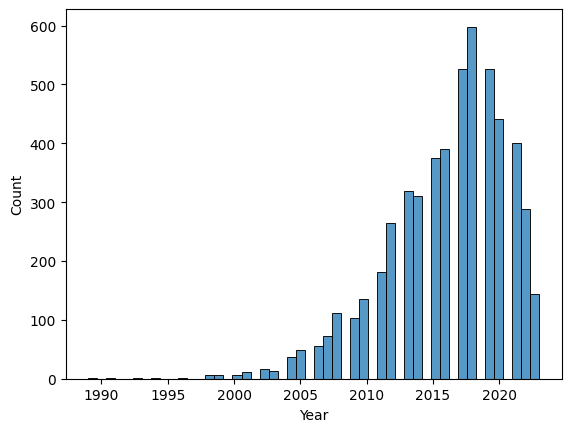

In [ ]:
#### Outliers only present in year column #####
sns.histplot(df["Year"])


<ipython-input-53-fe08f6e430f0>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Year"])


<Axes: xlabel='Year', ylabel='Density'>

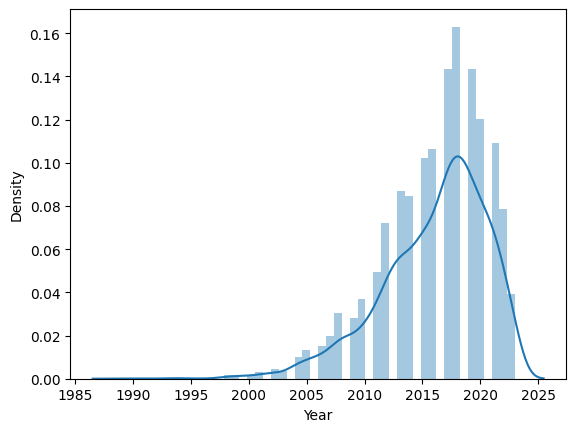

In [ ]:
#### Outliers only present in year column #####
sns.distplot(df["Year"])


<Axes: >

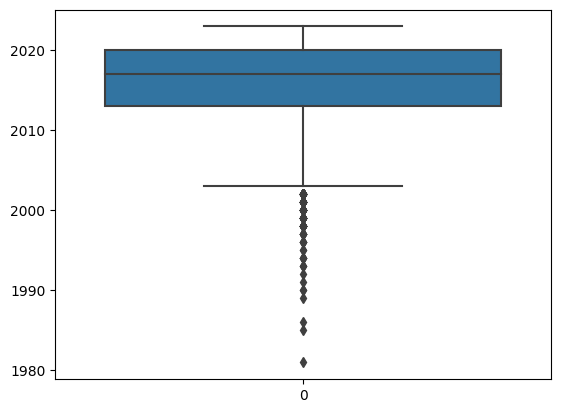

In [ ]:
sns.boxplot(df["Year"])

In [ ]:
data=df["Year"]
row_drp_rmv_outl=[15872, 1025, 2562, 7170, 8196, 13317, 16388, 7, 11791, 6160, 530, 4118, 11798, 15895, 16406, 11802, 14363, 10270, 7711, 11806, 8229, 11813, 551, 16086, 7725, 12335, 5680, 3126, 3638, 8248, 3641, 14392, 4667, 10300, 10814, 16600, 2629, 15431, 3144, 15433, 586, 2125, 4174, 10326, 4697, 10842, 7771, 3166, 3170, 15971, 2148, 11878, 4716, 11884, 11374, 11376, 3187, 4214, 5238, 8823, 3197, 8318, 9341, 15998, 10881, 12419, 5252, 4231, 10377]

<Axes: >

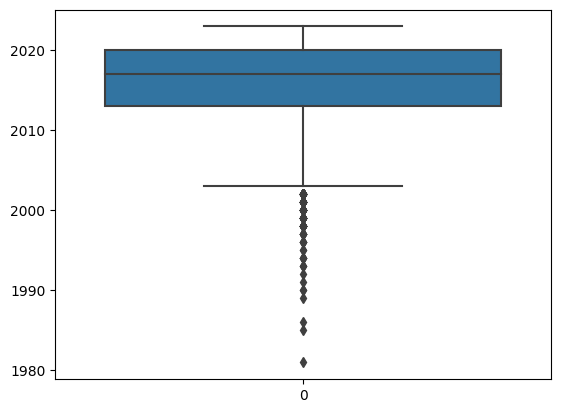

In [ ]:
sns.boxplot(df["Year"])

# Removing constant column

In [ ]:
for i in df.columns:
    if len(df[i].unique()) == 1:
        df.drop(i,axis=1,inplace=True)
        print('Dropped Column Name:',i)
    else:
        pass

Dropped Column Name: fuel_comsumption_km


# Handiling High Cardinality

In [ ]:
for i in df.select_dtypes(include=['object']).columns.tolist():
    print(f'{i}--->{len(df[i].unique())}')


Brand--->62
UsedOrNew--->3
Transmission--->2
DriveType--->5
FuelType--->9
BodyType--->10
carColor--->656


In [ ]:
'''
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
df['Transmission'].value_counts()
'''

"\npd.set_option('display.max_rows', None)  \npd.set_option('display.max_columns', None)  \ndf['Transmission'].value_counts()\n"

#### Dropping rows of Brand column which value count is less than 300

In [ ]:
name_counts = df['Brand'].value_counts()
names_to_keep = name_counts[name_counts >= 300].index
df = df[df['Brand'].isin(names_to_keep)]
df.shape

(9256, 15)

#### Dropping rows of carColor column which value count is less than 100

In [ ]:
name_counts = df['carColor'].value_counts()
names_to_keep = name_counts[name_counts >= 100].index
df = df[df['carColor'].isin(names_to_keep)]
df.shape

(7388, 15)

#### Dropping rows of BodyType column which value count is less than 1000

In [ ]:
name_counts = df['BodyType'].value_counts()
names_to_keep = name_counts[name_counts >= 1000].index
df = df[df['BodyType'].isin(names_to_keep)]
df.shape

(5394, 15)

In [ ]:
df['BodyType'].value_counts()

SUV          2860
Hatchback    1347
Ute  Tray    1187
Name: BodyType, dtype: int64

# Separating labels

In [ ]:
X=df.drop('Price', axis=1)
Y=df['Price']

# Feature scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
target_col_name='Price'
col_for_scaled=[]
all_col_nm= X.select_dtypes(include=['number']).columns.tolist()

for i in range(len(all_col_nm)):
    xx=list(X[all_col_nm[i]].unique())

    if max(xx)>2:
        if all_col_nm[i]==target_col_name:
            pass
        else:
            col_for_scaled.append(all_col_nm[i])
    else:
        pass

x_cols_for_scale=X[col_for_scaled]
scaler = StandardScaler()
scaler.fit(x_cols_for_scale)


x_transform_dt = scaler.transform(x_cols_for_scale)
x_scaled_df = pd.DataFrame(x_transform_dt, columns=col_for_scaled)
X.drop(col_for_scaled,axis=1,inplace=True)
X.reset_index(drop=True, inplace=True)
x_scaled_df.reset_index(drop=True, inplace=True)
X=pd.concat([X, x_scaled_df], axis=1)
X.head()



,Brand,UsedOrNew,Transmission,DriveType,FuelType,BodyType,carColor,Year,Kilometres,Doors,Seats,Engine_cylinder_number,Engine_total_volume,fuel_comsumption_liter
0,Toyota,USED,Automatic,Other,-,SUV,Silver Grey,0.210481,0.347144,-0.198985,1.428872,0.091024,0.526825,-0.437917
1,Volkswagen,USED,Automatic,Front,Premium,Hatchback,White Black,-0.886674,-0.678980,1.316508,-0.181080,-0.377729,-1.341262,-0.728905
2,BMW,USED,Automatic,4WD,Diesel,SUV,Black Black,-0.447812,-0.335988,-0.198985,-0.181080,-0.377729,-0.492131,-1.040679
3,BMW,USED,Automatic,Rear,Diesel,Hatchback,Silver,-1.106105,-0.175871,1.316508,-0.181080,-0.377729,-0.492131,-1.144604
4,Ford,USED,Automatic,Front,Unleaded,Hatchback,White Black,-0.447812,-0.416619,1.316508,-0.181080,-1.549612,-1.907348,-1.144604


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoding=LabelEncoder()
X["Transmission"]=encoding.fit_transform(X["Transmission"])
X["UsedOrNew"]=encoding.fit_transform(X["UsedOrNew"])


In [ ]:
!pip install category_encoders
!pip install sklearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 1.2 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
import sklearn

In [ ]:
numerical_cols = X.select_dtypes(include=['int', 'float']).columns.tolist()
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()


encoder = sklearn.preprocessing.OneHotEncoder(sparse=False, handle_unknown='ignore')

# Fit and transform the categorical columns
encoded_categorical = encoder.fit_transform(X[categorical_cols])

# Create DataFrame with the encoded categorical columns
encoded_df = pd.DataFrame(encoded_categorical, columns=encoder.get_feature_names_out(categorical_cols))

# Combine encoded categorical columns with numerical columns
X = pd.concat([X[numerical_cols], encoded_df], axis=1)



/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
X.head()

,UsedOrNew,Transmission,Year,Kilometres,Doors,Seats,Engine_cylinder_number,Engine_total_volume,fuel_comsumption_liter,Brand_Audi,...,carColor_Grey Black,carColor_Grey Grey,carColor_Red,carColor_Red Black,carColor_Silver,carColor_Silver Black,carColor_Silver Grey,carColor_White,carColor_White Black,carColor_White Grey
0,2,0,0.210481,0.347144,-0.198985,1.428872,0.091024,0.526825,-0.437917,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,2,0,-0.886674,-0.678980,1.316508,-0.181080,-0.377729,-1.341262,-0.728905,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2,0,-0.447812,-0.335988,-0.198985,-0.181080,-0.377729,-0.492131,-1.040679,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2,0,-1.106105,-0.175871,1.316508,-0.181080,-0.377729,-0.492131,-1.144604,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,2,0,-0.447812,-0.416619,1.316508,-0.181080,-1.549612,-1.907348,-1.144604,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


# Encoding

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2, random_state=1232224)

In [ ]:
from sklearn.ensemble import RandomForestRegressor as randomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
rfr=randomForestRegressor()
rfr.fit(x_train,y_train)
rfrtd=rfr.predict(x_test)
rfrr2=r2_score(y_test,rfrtd)
rfrr2

0.8779552847015281

#### Model Evaluation

In [ ]:
# make predictions on the testing set
y_pred = rfr.predict(x_test)

# Calculate MSE
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

# Calculate RMSE
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

# Calculate R2 score
r2 = r2_score(y_test, y_pred)
print("R-squared (R2) Score:", r2)








Mean Squared Error (MSE): 50993056.59758076
Root Mean Squared Error (RMSE): 7140.942276589327
Mean Absolute Error (MAE): 4126.591615122848
R-squared (R2) Score: 0.8779552847015281


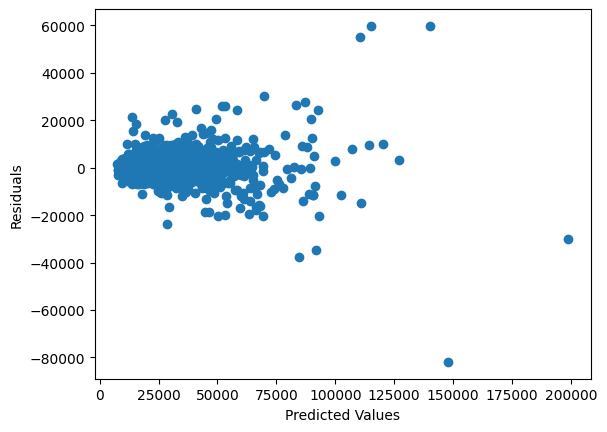

In [ ]:
#********** Plot the residuals *************\n")
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()